**About Boston Housing Dataset**<br>

A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass. The dataset contains a total of 506 cases. There are 14 attributes in each case of the dataset (first 13 are feature variables or predictors and MEDV is the response variable). They are:

CRIM - per capita crime rate by town<br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per \$10,000<br>
PTRATIO - pupil-teacher ratio by town<br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
LSTAT - % lower status of the population<br>
MEDV - Median value of owner-occupied homes in $1000's

**About this Project**<br>

This Project entailed detailed data exploration and visualizations of Boston Housing Dataset. It also includes building and implementing variety of regression models (viz. Linear Regression, Decision Tree Regression, XGBoost etc.) in machine learning using techniques like cross validation for evaluation and grid search for fine tuning the algorithm. Interpretations are included inline

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import norm
from sklearn import linear_model
from sklearn import cross_validation as cval
import sklearn.metrics as metrics
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import xgboost as xgb
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [553]:
#Loading the Boston Housing Dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset = pd.read_csv(url, names=names, delim_whitespace = True)

In [390]:
#check the number of cases and features
dataset.shape

(506, 13)

In [391]:
#First-hand exploration
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [392]:
#Descriptive statistics
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [393]:
#check if data is missing
dataset.apply(lambda x: sum(x.isnull()))
#no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

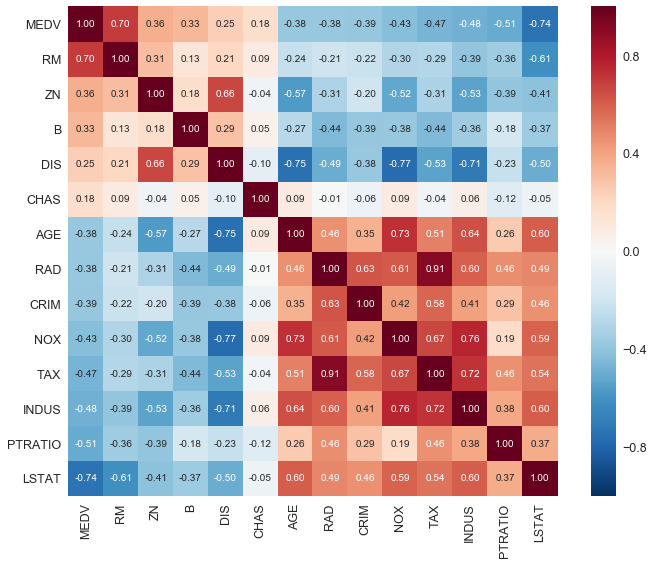

In [397]:
#Plot the diagram depicting correlation of MEDV with various feature variables
corr=dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 14 #you can change the number of variables to display in heatmap in the order of reducing correlation coefficients
cols = corr.nlargest(k, 'MEDV')['MEDV'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Observer the correlation of MEDV with various features and also correlation between features - indicates that 
#MEDV has highest absolute correlation with LSTAT,RM and PTRATIO in that order
#Note that correlation matrix displays Pearson coeefficients (by default) which take into account linear correlation only

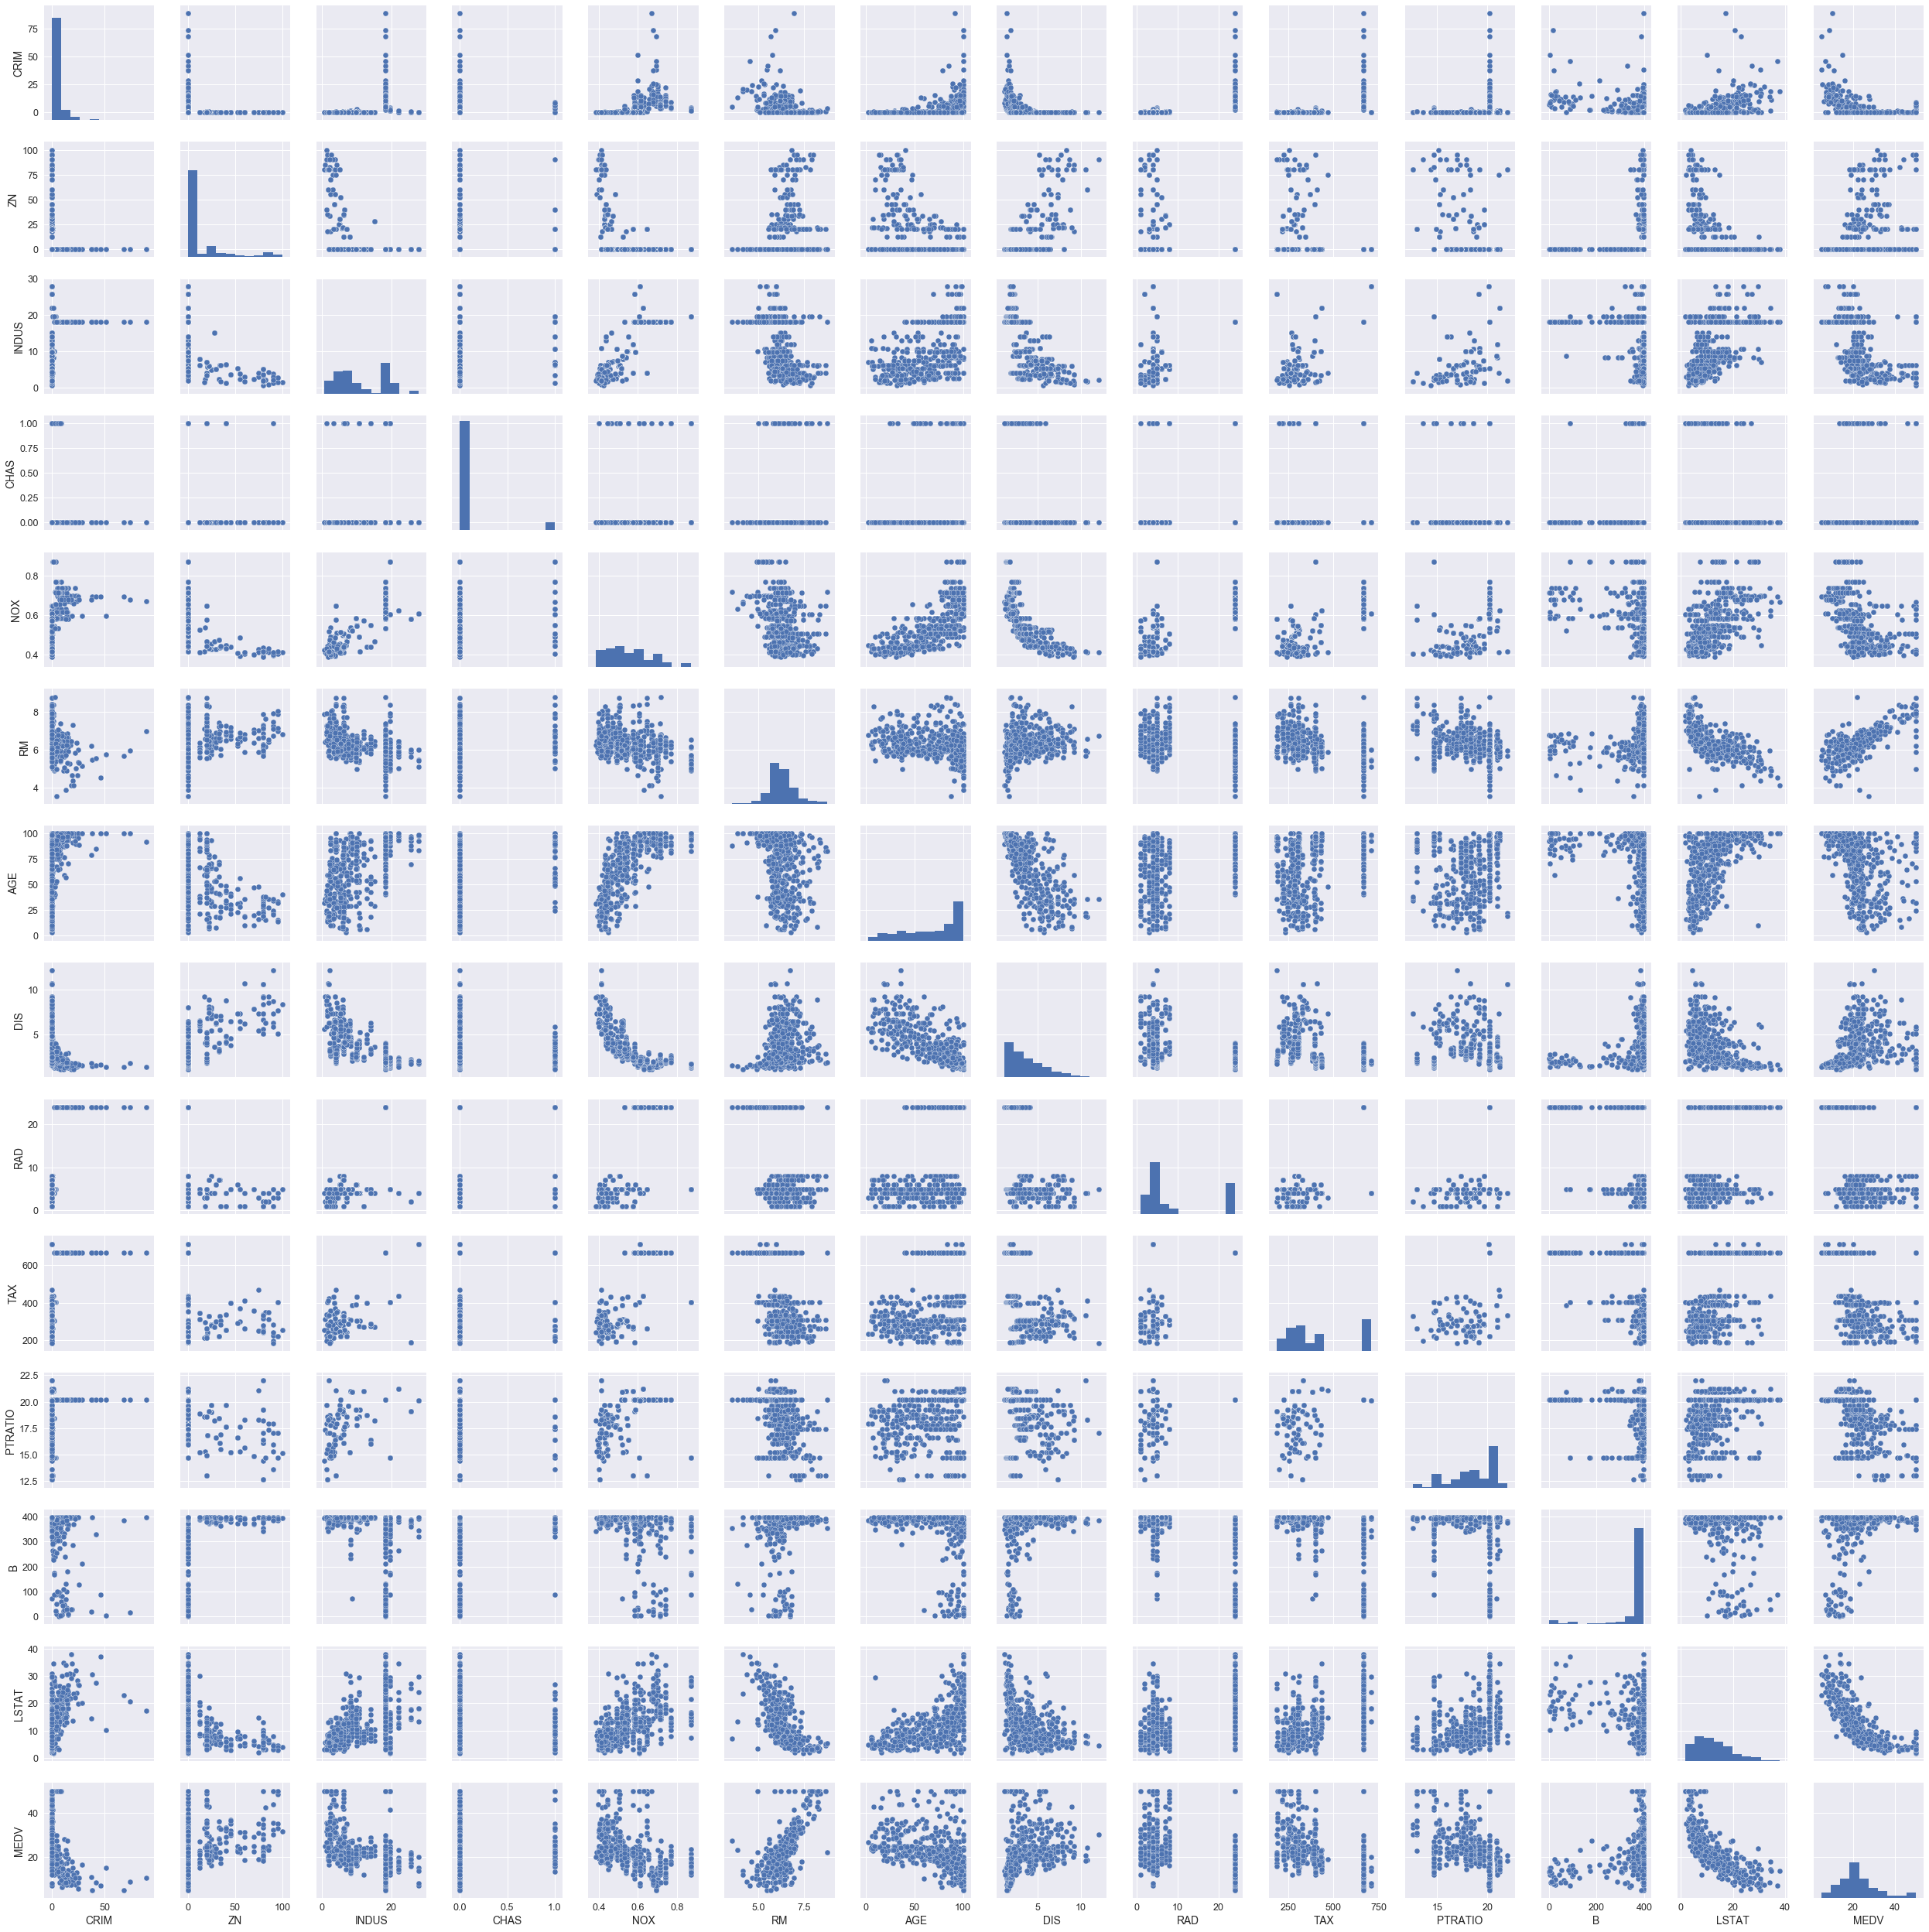

In [423]:
sns.pairplot(data=dataset)
plt.show()

#from the pairplots it can be seen that MEDV is linearly related with RM
#However the relationship between MEDV and LSTAT is non-linear and can be made linear by using log transformations, see below
#also observe other scatter plots to investigate more

In [398]:
#separate labels from features
y = dataset['MEDV'].copy()
dataset.drop(labels=['MEDV'], inplace=True, axis=1)

In [474]:
#Split the data into train and test sets
data_train, data_test, labels_train, labels_test = train_test_split(dataset, y, test_size=0.2, random_state=4)

In [400]:
#Apply various regression models

Multiple Linear Regression

In [575]:
#considering all the 13 features first
features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
#features=['CRIM', 'ZN',  'CHAS',  'RM','DIS','RAD','TAX','PTRATIO','B','LSTAT'] #Check by removing less important feature - see below
#features=['LSTAT','RM', 'PTRATIO'] #consider top three features having highest correlation with MEDV; check after LSTAT and PTRATIO are log transformed- see below
model = linear_model.LinearRegression()
model = model.fit(data_train[features], labels_train)

pred_train =model.predict(data_train[features]) 
pred_test=model.predict(data_test[features])

#print coefficients
print zip(features, model.coef_)

#print cross-validation score using train data and print R2 scores for training and test data
print "\nCross Validation Score (Train Data) : %s" % "{0:.2%}".format((cval.cross_val_score(model, data_train[features], labels_train, cv=5).mean())) 
print "\nAccuracy: R2 score (Train Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_train,pred_train))
print "Accuracy: R2 score (Test Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_test,pred_test))
print '\nRMSE train: %.3f\nRMSE test: %.3f' % (mean_squared_error(labels_train, pred_train),mean_squared_error(labels_test, pred_test))

R2=metrics.r2_score(labels_train,pred_train)
adjusted_R2 = 1 - (1-R2)*(len(labels_train)-1)/(len(labels_train)-data_train.shape[1]-1)
R2test=metrics.r2_score(labels_test,pred_test)
adjusted_R2test = 1 - (1-R2test)*(len(labels_test)-1)/(len(labels_test)-data_test.shape[1]-1)
print "\nAdjusted R2 score (Train): %s" % "{0:.2%}".format(adjusted_R2)
print "\nAdjusted R2 score (Test): %s" % "{0:.2%}".format(adjusted_R2test)

[('CRIM', -0.14056334998023909), ('ZN', 0.019841912046362459), ('INDUS', -0.48822938687524997), ('CHAS', 2.7092103310013553), ('NOX', -15.337124373130072), ('RM', 2.4416006027806336), ('AGE', 0.014791043311395136), ('DIS', -1.3695381170059897), ('RAD', 0.26440608665779719), ('TAX', -4.1550827872162293), ('PTRATIO', -15.114077847445923), ('B', 0.0073918913545405474), ('LSTAT', -8.5210392497823513)]

Cross Validation Score (Train Data) : 77.65%

Accuracy: R2 score (Train Data) : 79.24%
Accuracy: R2 score (Test Data) : 80.24%

RMSE train: 17.024
RMSE test: 18.356

Adjusted R2 score (Train): 78.49%

Adjusted R2 score (Test): 77.06%


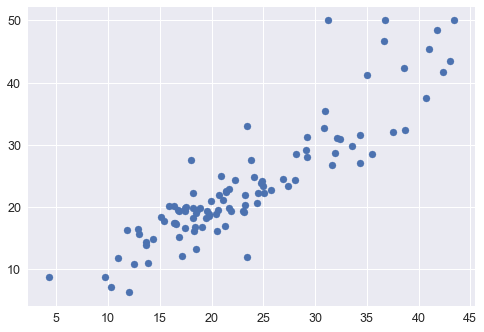

In [555]:
#Plot scatter of predicted vs. actuals for test set
plt.scatter(pred_test,labels_test)
plt.show()

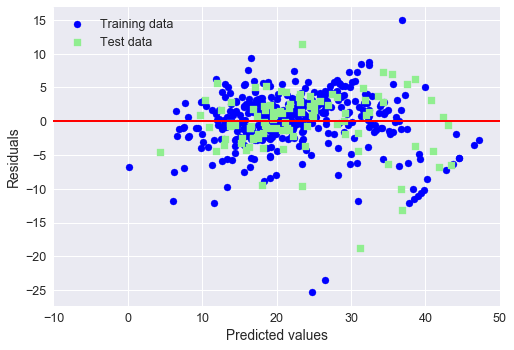

In [556]:
#Plot Residual vs Predicted scatter plots for Linear Regression
plt.scatter(pred_train, pred_train - labels_train, c='blue', marker='o', label='Training data')
plt.scatter(pred_test,  pred_test - labels_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

#For a good regression model, we would expect that the errors are randomly distributed and the residuals should be randomly scattered around the centerline
#Below scatter diagram indicates presence of certain outliers,and also not so constant variance in errors
#We shall deal with this further below

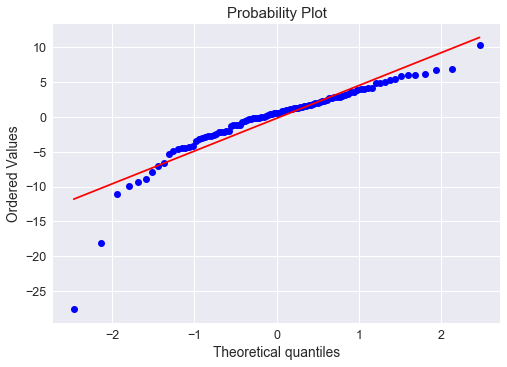

In [557]:
#QQ plot to assess normality of residuals
res = stats.probplot(residuals, plot=plt)
plt.show()
#The residuals are not normal and there are outliers present

In [558]:
#As we are modeling our data using Linear Regression and we would want to know feature importances let us use OLS method
ols=sm.OLS(labels_train,data_train[features])
result=ols.fit()

In [559]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     777.3
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          5.60e-270
Time:                        10:34:43   Log-Likelihood:                -1193.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     391   BIC:                             2465.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1273      0.037     -3.462      0.001      -0.200      -0.055
ZN             0.0219      0.016      1.335      0.183      -0.010       0.054
INDUS         -1.7173      0.580     -2.962      0.003      -2.857      -0.577
CHAS           3.4033      1.021      3.335      0.001       1.397       5.410
NOX           -4.1495      3.957     -1.049      0.295     -11.929       3.630
RM             4.5558      0.422     10.790      0.000       3.726       5.386
AGE           -0.0012      0.015     -0.079      0.937      -0.031       0.028
DIS           -1.1822      0.225     -5.258      0.000      -1.624      -0.740
RAD           -0.0888      0.048     -1.870      0.062      -0.182       0.005
TAX            3.1852      1.108      2.876      0.004       1.008       5.363
PTRATIO       -0.1803      1.914     -0.094      0.925      -3.944       3.584
B              0.0111      0.003      3.735      0.000       0.005       0.017
LSTAT         -7.2261      0.725     -9.972      0.000      -8.651      -5.801
==============================================================================
Omnibus:                      108.609   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.904
Skew:                           1.085   Prob(JB):                    3.41e-108
Kurtosis:                       7.969   Cond. No.                     6.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#OLS result summary indicates AIC: 2447 (lower the AIC , better is the model)
#High value of condition no. indicates multi-collinearity between features; which can be handled by eliminating certain features
#Features having p-value < 0.05 are more significant
#Test the model by eliminating less important features like INDUS, NOX and AGE (in above cell) - which leads to minor drop in accuracy scores

In [ ]:
#Let us try Linear Regression model by exploring some data transformations like log transforming response/feature variables 
#to handle non-linearity, heteroskedasticity (non constant error variance) and non-normality of residuals

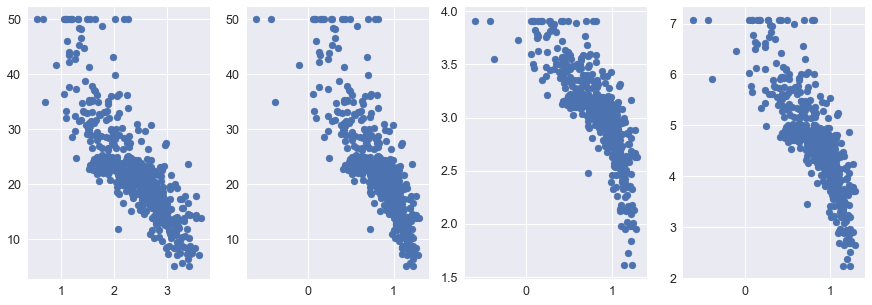

In [501]:
#Scatter plot between MEDV and LSTAT
#Try various transformations for LSTAT and MEDV, log transform of LSTAT causes relationship between LSTAT and MEDV to be lnear
#Note that when non-linearity is the major problem, features are log transformed
#if error variance are not constant, that is , if heteroskedasticity is the main problem, response variable is transformed
#if residuals do not adhere to any assumptions both features/ response need to be transformed exploring log, sqrt and other transformations
fig, (axis1,axis2, axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
axis1.scatter(x=dataset.LSTAT, y=y)
axis2.scatter(x=np.log(dataset.LSTAT), y=y)
axis3.scatter(x=np.log(dataset.LSTAT),y=np.log(y))
axis4.scatter(x=np.log(dataset.LSTAT),y=np.sqrt(y))
plt.show()

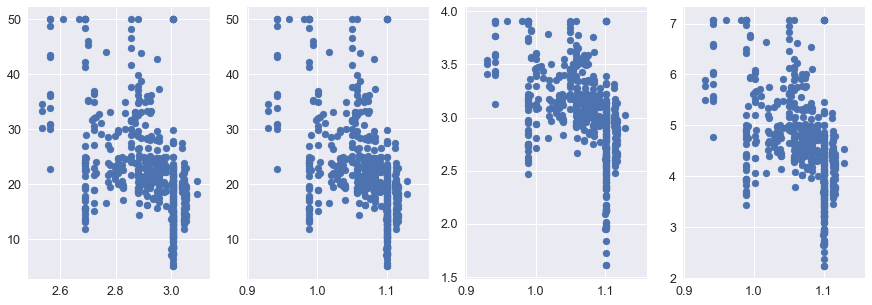

In [480]:
#Scatter plot between MEDV and PTRATIO
fig, (axis1,axis2, axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
axis1.scatter(x=dataset.PTRATIO, y=y)
axis2.scatter(x=np.log(dataset.PTRATIO), y=y)
axis3.scatter(x=np.log(dataset.PTRATIO),y=np.log(y))
axis4.scatter(x=np.log(dataset.PTRATIO),y=np.sqrt(y))
plt.show()

#Similarly we will log transform PTRATIO

In [434]:
dataset.LSTAT=np.log(dataset.LSTAT)
dataset.PTRATIO=np.log(dataset.PTRATIO)

#Now use RM and transformed LSTAT and PTRATIO (as these have highest absolute correlation with MEDV) as features 
#to test if accuracy scores have improved or not - improved but little
#From different pairplots we noted that there are some non-linear relations between MEDV and features which can be handled to
#some extent by transforming predictor variables

In [ ]:
#To inverse these transformations you can use-
dataset.LSTAT=np.exp(dataset.LSTAT)
dataset.PTRATIO=np.exp(dataset.PTRATIO)

Turning a linear regression model into a curve - polynomial regression

In [486]:
labels_train.shape

(404L,)

In [574]:
#Now let us explore PolynomialFeatures which generates a new feature matrix consisting of all polynomial combinations 
#of the features with degree less than or equal to the specified degree
quadratic = PolynomialFeatures(degree=2)
quadratic.fit(data_train[features])
data_train_quad=quadratic.transform(data_train[features])
data_test_quad=quadratic.transform(data_test[features])

pr=linear_model.LinearRegression()
pr.fit(data_train_quad,labels_train)

pred_test_quad=pr.predict(data_test_quad)
pred_train_quad=pr.predict(data_train_quad)

print "\nCross Validation Score (Train Data) : %s" % "{0:.2%}".format((cval.cross_val_score(pr, data_train[features], labels_train, cv=5).mean())) 
print "\nAccuracy: R2 score (Train Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_train,pred_train_quad))
print "Accuracy: R2 score (Test Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_test,pred_test_quad))
print '\nRMSE train: %.3f\nRMSE test: %.3f' % (mean_squared_error(labels_train, pred_train_quad),mean_squared_error(labels_test, pred_test_quad))

R2=metrics.r2_score(labels_train,pred_train_quad)
adjusted_R2 = 1 - (1-R2)*(len(labels_train)-1)/(len(labels_train)-data_train.shape[1]-1)
R2test=metrics.r2_score(labels_test,pred_test_quad)
adjusted_R2test = 1 - (1-R2test)*(len(labels_test)-1)/(len(labels_test)-data_test.shape[1]-1)
print "\nAdjusted R2 score (Train): %s" % "{0:.2%}".format(adjusted_R2)
print "\nAdjusted R2 score (Test): %s" % "{0:.2%}".format(adjusted_R2test)

#Compare the results of Polynomial Regression with those of Linear Regression
#We can notice considerable increase in accuracy and adjusted R2 and drop in RMSE, with CV score remaining more-or-less same


Cross Validation Score (Train Data) : 77.65%

Accuracy: R2 score (Train Data) : 92.45%
Accuracy: R2 score (Test Data) : 84.99%

RMSE train: 6.194
RMSE test: 13.938

Adjusted R2 score (Train): 92.18%

Adjusted R2 score (Test): 82.58%


In [ ]:
#It should be noted that modeling non-linear transformation by Ploynomial Regression as above is not the best way to
#approach non-linear problems as it can lead to overfitting and over-complex models
#As we've seen above Non-linear relationship between MEDV and LSTAT can be handled by simple log transformation of LSTAT

In [538]:
#For some of the machine learning & dimensionality reduction algorithms like PCA, SVC etc. which are based on distance function,
#it is required that data is scaled or standardised

scaled=preprocessing.StandardScaler()
scaled.fit(data_train[features])
data_train_std=scaled.transform(data_train[features])
data_test_std=scaled.transform(data_test[features])

Support Vector Regression

In [573]:
from sklearn.svm import SVR
svr= SVR(kernel='linear',degree=2)
svr.fit(data_train_std,labels_train)
pred_train=svr.predict(data_train_std)
pred_test=svr.predict(data_test_std)
print "\nCross Validation Score (Train Data) : %s" % "{0:.2%}".format((cval.cross_val_score(svr, data_train_std, labels_train, cv=5).mean())) 
print "\nAccuracy: R2 score (Train Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_train,pred_train))
print "Accuracy: R2 score (Test Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_test,pred_test))
print '\nRMSE train: %.3f\nRMSE test: %.3f' % (mean_squared_error(labels_train, pred_train),mean_squared_error(labels_test, pred_test))

R2=metrics.r2_score(labels_train,pred_train)
adjusted_R2 = 1 - (1-R2)*(len(labels_train)-1)/(len(labels_train)-data_train_std.shape[1]-1)
R2test=metrics.r2_score(labels_test,pred_test)
adjusted_R2test = 1 - (1-R2test)*(len(labels_test)-1)/(len(labels_test)-data_test_std.shape[1]-1)
print "\nAdjusted R2 score (Train): %s" % "{0:.2%}".format(adjusted_R2)
print "\nAdjusted R2 score (Test): %s" % "{0:.2%}".format(adjusted_R2test)

#accuracy and RMSE scores are better when data is standardized


Cross Validation Score (Train Data) : 70.66%

Accuracy: R2 score (Train Data) : 71.60%
Accuracy: R2 score (Test Data) : 72.00%

RMSE train: 23.292
RMSE test: 26.008

Adjusted R2 score (Train): 71.31%

Adjusted R2 score (Test): 70.85%


Dealing with nonlinear relationships using Random Forests

In [591]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=12345)
#rf = RandomForestRegressor(random_state=12345, n_estimators=400,max_depth=7,min_samples_split=2) #parameter tuning using GridSearch - see below
rf.fit(data_train[features], labels_train)
pred_test = rf.predict(data_test[features])
pred_train =rf.predict(data_train[features]) 

#print cross-validation score using train data and print R2 scores for training and test data
print "\nCross Validation Score (Train Data) : %s" % "{0:.2%}".format((cval.cross_val_score(rf, data_train[features], labels_train, cv=5).mean())) 
print "\nAccuracy: R2 score (Train Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_train,pred_train))
print "Accuracy: R2 score (Test Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_test,pred_test))
print '\nRMSE train: %.3f\nRMSE test: %.3f' % (mean_squared_error(labels_train, pred_train),mean_squared_error(labels_test, pred_test))

R2=metrics.r2_score(labels_train,pred_train)
adjusted_R2 = 1 - (1-R2)*(len(labels_train)-1)/(len(labels_train)-data_train.shape[1]-1)
R2test=metrics.r2_score(labels_test,pred_test)
adjusted_R2test = 1 - (1-R2test)*(len(labels_test)-1)/(len(labels_test)-data_test.shape[1]-1)
print "\nAdjusted R2 score (Train): %s" % "{0:.2%}".format(adjusted_R2)
print "\nAdjusted R2 score (Test): %s" % "{0:.2%}".format(adjusted_R2test)

#print feature importances
print "\nFeature Importances: %s" %zip(features, rf.feature_importances_)

#It can be noted that although RMSE on train set is considerably low as compared to linear regression, RMSe on test set is large
#This indicates over-fitting which can be handled by properly tuning the RF, let us use GridSearchCV to tune our RF model


Cross Validation Score (Train Data) : 84.74%

Accuracy: R2 score (Train Data) : 96.44%
Accuracy: R2 score (Test Data) : 81.26%

RMSE train: 2.922
RMSE test: 17.409

Adjusted R2 score (Train): 96.31%

Adjusted R2 score (Test): 78.24%

Feature Importances: [('CRIM', 0.044400115405719386), ('ZN', 0.00052547334566682799), ('INDUS', 0.0060253933261061546), ('CHAS', 0.00065424451207677162), ('NOX', 0.017060899879222088), ('RM', 0.50665290126467077), ('AGE', 0.011487073931514141), ('DIS', 0.054989127623735763), ('RAD', 0.003754594590812909), ('TAX', 0.016247484659210706), ('PTRATIO', 0.018883113346188096), ('B', 0.0095550652858448146), ('LSTAT', 0.30976451282923179)]


In [576]:
#GridSearch for parameter tuning of Random Forest model
param_grid = { "max_depth" : [4,5,6,7], "min_samples_split" : [2,3,4], "n_estimators":[200,300,400]}
grid_search = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)
grid_search.fit(data_train[features], labels_train)
print (grid_search.best_params_)
print grid_search.best_score_

#Let us use these parameters to re-evaluate the accuracy scores of random forest model

{'min_samples_split': 2, 'n_estimators': 400, 'max_depth': 7}
0.847544788978


XGBoost Regression

In [585]:
gbm = xgb.XGBRegressor(seed=777)
#gbm=xgb.XGBRegressor(n_estimators=400,max_depth=7,min_child_weight=3,learning_rate=0.1,gamma=0.05) #parameter tuning using GridSearch - see below
gbm.fit(data_train[features],labels_train)

pred_train =gbm.predict(data_train[features]) 
pred_test=gbm.predict(data_test[features])

#print cross-validation score using train data and print R2 scores for training and test data
print "\nCross Validation Score (Train Data) : %s" % "{0:.2%}".format((cval.cross_val_score(gbm, data_train[features], labels_train, cv=5).mean())) 
print "\nAccuracy: R2 score (Train Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_train,pred_train))
print "Accuracy: R2 score (Test Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_test,pred_test))
print '\nRMSE train: %.3f\nRMSE test: %.3f' % (mean_squared_error(labels_train, pred_train),mean_squared_error(labels_test, pred_test))

R2=metrics.r2_score(labels_train,pred_train)
adjusted_R2 = 1 - (1-R2)*(len(labels_train)-1)/(len(labels_train)-data_train.shape[1]-1)
R2test=metrics.r2_score(labels_test,pred_test)
adjusted_R2test = 1 - (1-R2test)*(len(labels_test)-1)/(len(labels_test)-data_test.shape[1]-1)
print "\nAdjusted R2 score (Train): %s" % "{0:.2%}".format(adjusted_R2)
print "\nAdjusted R2 score (Test): %s" % "{0:.2%}".format(adjusted_R2test)

#It can be noted that although RMSE on train set is considerably low as compared to linear regression, RMSe on test set is large
#This indicates over-fitting which can be handled by properly tuning the XGB, let us use GridSearchCV to tune our XGB model


Cross Validation Score (Train Data) : 86.09%

Accuracy: R2 score (Train Data) : 97.17%
Accuracy: R2 score (Test Data) : 82.75%

RMSE train: 2.318
RMSE test: 16.025

Adjusted R2 score (Train): 97.07%

Adjusted R2 score (Test): 79.97%


In [579]:
#GridSearch for parameter tuning of Random Forest model
param_grid = { "max_depth" : [4,5,6,7], "learning_rate" : [0.01,0.05,0.1], "n_estimators":[200,300,400], "gamma":[0.05,0.1],"min_child_weight":[2,3,4]}
grid_search = GridSearchCV(gbm, param_grid, n_jobs=-1, cv=5)
grid_search.fit(data_train[features], labels_train)

print grid_search.best_score_

#Let us use these parameters to re-evaluate the accuracy scores of XGBoost model
#You can further tune this model by using a broader range of parameters and then narrowing down to get the best set of parameters

{'n_estimators': 400, 'learning_rate': 0.1, 'max_depth': 7, 'gamma': 0.05, 'min_child_weight': 3}
0.872892339315


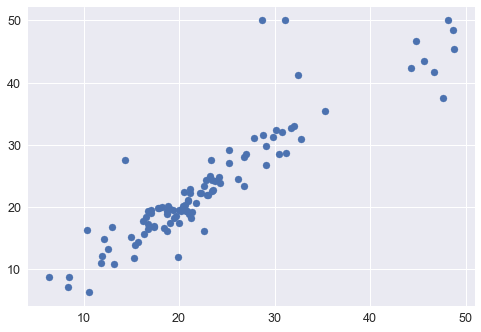

In [586]:
plt.scatter(pred_test,labels_test)
plt.show()

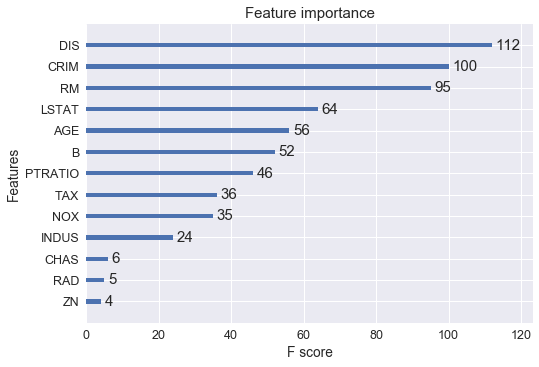

In [588]:
# plot feature importance
from xgboost import plot_importance
plot_importance(gbm)
plt.show()

In [589]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state':15325}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(data_train[features], labels_train)
pred_test=gbr.predict(data_test[features])
pred_train=gbr.predict(data_train[features])

#print cross-validation score using train data and print R2 scores for training and test data
print "\nCross Validation Score (Train Data) : %s" % "{0:.2%}".format((cval.cross_val_score(gbr, data_train[features], labels_train, cv=5).mean())) 
print "\nAccuracy: R2 score (Train Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_train,pred_train))
print "Accuracy: R2 score (Test Data) : %s" % "{0:.2%}".format(metrics.r2_score(labels_test,pred_test))
print '\nRMSE train: %.3f\nRMSE test: %.3f' % (mean_squared_error(labels_train, pred_train),mean_squared_error(labels_test, pred_test))

R2=metrics.r2_score(labels_train,pred_train)
adjusted_R2 = 1 - (1-R2)*(len(labels_train)-1)/(len(labels_train)-data_train.shape[1]-1)
R2test=metrics.r2_score(labels_test,pred_test)
adjusted_R2test = 1 - (1-R2test)*(len(labels_test)-1)/(len(labels_test)-data_test.shape[1]-1)
print "\nAdjusted R2 score (Train): %s" % "{0:.2%}".format(adjusted_R2)
print "\nAdjusted R2 score (Test): %s" % "{0:.2%}".format(adjusted_R2test)

#You can tune this further by using GridSearchCV


Cross Validation Score (Train Data) : 86.14%

Accuracy: R2 score (Train Data) : 98.00%
Accuracy: R2 score (Test Data) : 85.87%

RMSE train: 1.643
RMSE test: 13.122

Adjusted R2 score (Train): 97.92%

Adjusted R2 score (Test): 83.60%


In [592]:
#We can tune and compare various models for accuracy and RMSE values